# Parte 0 - Instalação (usando Anaconda Python)

Abaixo estão os comandos usados para instalar todas as dependências necessárias para esta aula. Se você não tem uma GPU NVidia troque `tensorflow-gpu` por `tensorflow`.

    > conda create -n CV-NN python=3.6
    > conda activate CV-NN
    > conda install tensorflow-gpu scikit-learn jupyter[notebook] numpy keras

Os comandos acima criam um ambiente virtual com Python 3.6 (3.7 não funciona ainda). Isto não é necessário, mas pode ser interessante para organizar melhor as dependências dos seus projetos. Uma vantagem de usar o Anaconda é que ele já instala o CUDA SDK automaticamente (no caso de usar `tensorflow-gpu`). 

# Parte 1 - Classificação categórica

Na última atividade vimos um exemplo de **classificação binária**, em que classificamos imagens em pertencendo ou não a uma classe (*cachorros* vs *faces*). Nesta atividade exercitaremos a classificação em categorias e para isto usaremos um modelo que se adapta bem a este tipo de situação: *Regressão logística* e a *entropia categórica*.

Além do scikit-learn, usado no roteiro passado, neste roteiro usaremos também a biblioteca [keras](http://keras.io) para treinar redes neurais que façam a classificação categórica de imagens de dígitos manuscritos. Veja abaixo o código para carregar os dados e um exemplo de imagem que usaremos.

# Imagens: 60000
Tamanho: (28, 28)
Primeiro número: 5


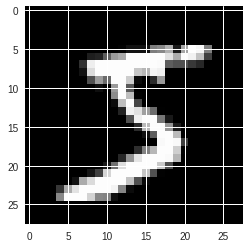

In [24]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(X, y), (Xt, yt) = mnist.load_data()
print('# Imagens:', y.shape[0])
print('Tamanho:', X[0].shape)
print('Primeiro número:', y[0])
plt.imshow(X[0], cmap='gray')

Assim como na Atividade 3, dividimos as imagens disponíveis em um conjunto conhecido que usaremos para o treinamento de nossa rede (`X` e `y`) e um conjunto que só usaremos para avaliação (`Xt, yt`). Isto ajuda a não subestimar o erro em imagens desconhecidas. 

Nesta primeira parte iremos criar um modelo diretamente usando Regressão Logística. Para isto precisamos "deitar" a matriz da imagem $28\times 28$ em um grande vetor de dimensão $784$. 

**Exercício**: Faça isto abaixo e salve os dados transformados como `Xlr` e `Xtlr`.

In [0]:
Xlr = np.reshape(X, (X.shape[0], -1))
Xtlr = np.reshape(Xt, (Xt.shape[0], -1))

In [3]:
print(X.shape)
print(Xt.shape)
print(Xlr.shape)
print(Xtlr.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


A classe `sklearn.linear_model.LogisticRegression` é capaz de lidar com os rótulos das classes diretamente. Basta enviar o vetor `y` diretamente para a função de treinamento. 

**Dica**: para usarmos o modelo visto em sala de aula precisamos setar o parâmetro `multi_class` como `'multinomial'`. O treinamento é mais rápido se usarmos o solver `'saga'`

**Aviso**: o treinamento do modelo abaixo demora cerca de 5 minutos.

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(Xlr, y)

In [11]:
clf.predict(Xlr)
clf.predict_proba(Xlr)

array([[7.16459493e-05, 3.00345452e-08, 2.77553666e-04, ...,
        1.20122874e-05, 8.02824456e-05, 4.78367568e-05],
       [9.99992984e-01, 2.13118921e-13, 5.46192547e-07, ...,
        2.36443495e-08, 1.17459627e-06, 1.12075176e-06],
       [1.34116093e-04, 1.41588004e-06, 9.73634245e-02, ...,
        5.91785079e-03, 2.16417566e-03, 5.26331051e-03],
       ...,
       [6.96315900e-06, 1.89078981e-06, 2.25057415e-07, ...,
        1.06942422e-07, 4.84165445e-03, 1.13563865e-05],
       [5.44389764e-03, 2.24325421e-07, 2.20523492e-03, ...,
        1.25848267e-04, 1.80830367e-04, 5.16890014e-04],
       [7.44762908e-02, 2.39218152e-08, 4.49378651e-04, ...,
        2.86058331e-06, 9.08063414e-01, 1.60662273e-03]])

In [12]:
clf.score(Xlr, y)

0.9340666666666667

Como visto na expositiva, a *Regressão Logística* estima a probabilidade que um objeto seja de uma determinada classe. No caso dos dígitos temos 10 classes (`0` a `9`), logo nossa saída deverá ter dimensão 10 e cada componente deverá conter a probabilidade da imagem ter o dígito correspondente. 

O método `predict_proba(X)` calcula a probabilidade de cada classe para um conjunto de imagens passado em `X` (um por linha). 

**Pergunta**: suponha que seu classificador retornou, para a imagem acima, o seguinte vetor ao chamar `predict_proba`:

`[0, 0, 0, 0, 0, 0.6, 0.3, 0, 0, 0.1]`

Interprete o resultado obtido.

Cada elemento do vetor acima é a probabilidade da imagem representar cada dígito. Como podemos ver, a maior probabilidade é que a imagem represente o dígito 5.

**Exercício**: Assim como feito na atividade 3, avalie os resultados de seu classificador usando a função `score` e comente os resultados.

In [15]:
clf.predict(Xtlr)
clf.predict_proba(Xtlr)
clf.score(Xtlr, yt)

0.9252

Como tivemos um score de 0.9252, podemos concluir que nosso classificador está avaliando bem as imagens, porque ele está acertando em mais de 90% dos casos.

**Exercício**: Suponha que você precisa ler um número de 5 dígitos. Usando o classificador acima, qual seria a probabilidade de que este número seja lido corretamente? Este resultado é satisfatório?

In [16]:
0.9252**5

0.6779194908684575

A probabilide de que o número de 5 dígitos seja lido corretamente acaba sendo prejudicada, visto que o classificador precisa acertar os 5 dígitos corretamente. No nosso caso, a probabilidade cairia para 0.6779, porém, ainda seria um resultado satisfatório, visto que está maior que 60% dos casos.

# Parte 2 - Redes Neurais Multi-nível

**Aviso**: nos próximos exercícios usaremos a biblioteca [keras]

Nesta parte iremos criar uma rede neural "simples" com vários níveis. Diferentemente do classificador do *Scikit-learn*, ao trabalhar com redes neurais precisamos trabalhar com as probabilidades de maneira explícita. Para isto precisamos transformar nosso vetor de saída (que contém o número escrito na imagem) em uma matriz de classes binária.

**Exercício**: Pesquise o que é uma matriz de classes binária (também conhecida como *one hot encoding*)

Uma matriz de classes binária é uma representação de variáveis categóricas como vetores binários. As variáveis categóricas devem ser mapeadas por valores inteiros para que possa haver uma diferenciação.

**Exercício**: Use a função `to_categorical` do keras para converter `y` para uma matriz de classes binária `y_oe`. Faça o mesmo com `yt`

In [0]:
from keras.utils import to_categorical
y_oe = to_categorical(y, num_classes=10) #10 classes porque são 10 dígitos
yt_oe = to_categorical(yt, num_classes=10)

**Exercício**: os dados das imagens estão no intervalo $[0,255]$. Transforme-os para estarem no intervalor $[0, 1]$. Redes neurais tem melhor desempenho no intervalo menor. Salve os dados como `Xnn` e `Xtnn`

In [0]:
Xnn = Xlr/255
Xtnn = Xtlr/255

Nossa rede neural irá retornar, como saída, um vetor de dimensão 10 igual as linhas de `y_oe`.

----

Vamos agora construir a arquitetura de nossa rede neural. Seguiremos as seguintes instruções:

1. Nosso modelo será representado pela classe `Sequential`, que é uma lista de camadas tal que a saída de uma camada é passada diretamente para a próxima.
1. Cada camada será do tipo `Dense`, ou seja, cada nó da camada está ligado a todos os nós da camada anterior. A função de ativação usada será `'relu'.`
1. A saída será uma camada `Dense` também, mas com ativação `'softmax'`. Esta função de ativação computa as mesmas probabilidades da Regressão Logística.


**Exercício**: instancie um objeto de `Sequential` e use seu método `add()` para adicionar uma camada densa de tamanho $784$ e uma camada densa de saída. 

**Dica**: 
1. veja as documentações das classes [`Sequential`](https://keras.io/getting-started/sequential-model-guide/) e [`Dense`](https://keras.io/layers/core/#dense). As possíveis funções de ativação são mostradas [neste link](https://keras.io/activations/). 
2. Ao adicionar a primeira camada é preciso dizer qual é o tamanho da entrada da rede. Isto pode ser feito usando o argumento `input_dim` de `Dense()`
2. `Sequential.add()` é capaz de adivinhar o tamanho da entrada das próximas camadas baseado nos parâmetros passados. 
3. A camada de saída deve ter tamanho igual ao número de classes usadas (10, uma para cada dígito).

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(784, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))


Com nosso modelo pronto precisamos definir quais serão as opções usadas em seu treinamento. Fazemos isto com o método `compile`. A chamada abaixo já foi configurada supondo que sua rede se chama `model`.

In [0]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Vamos então treinar nosso modelo. Seguimos o mesmo padrão do *scikit-learn*, ou seja, chamamos o método `fit` com os dados de treinamento `Xnn` e `y_oe`. Iremos treinar com os seguintes argumentos: `batch_size=200, epochs=10`. Se quiser ter um relatório detalhado do progresso, adicione `verbose=2`.

In [32]:
model.fit(Xnn, y_oe, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
 - 6s - loss: 0.2742 - acc: 0.9194
Epoch 2/10
 - 6s - loss: 0.1070 - acc: 0.9681
Epoch 3/10
 - 6s - loss: 0.0690 - acc: 0.9797
Epoch 4/10
 - 6s - loss: 0.0494 - acc: 0.9847
Epoch 5/10
 - 6s - loss: 0.0356 - acc: 0.9893
Epoch 6/10
 - 6s - loss: 0.0267 - acc: 0.9920
Epoch 7/10
 - 6s - loss: 0.0201 - acc: 0.9943
Epoch 8/10
 - 6s - loss: 0.0152 - acc: 0.9956
Epoch 9/10
 - 6s - loss: 0.0114 - acc: 0.9967
Epoch 10/10
 - 6s - loss: 0.0088 - acc: 0.9978


**Exercício**: Use o método [`model.evaluate`](https://keras.io/models/model/#evaluate) para avaliar a rede neural treinada e avalie seus resultados levando em conta a mesma situação da Parte 1 (leitura de número com 5 dígitos).

In [33]:
model.evaluate(Xtnn, yt_oe)

10000/10000 [==============================] - 1s 110us/step


[0.07507649100208728, 0.982]

In [34]:
0.982**5

0.913182202990432

Agora os resultados seriam ainda melhores, pois a nossa chance de acerto aumentaria de 67% para 90%. Com isso, podemos verificar o benefício da utilização de redes neurais.



# Parte 3 - Redes Convolucionais

Redes convolucionais são redes neurais cujas camadas fazem operações que podem ser interpretadas como processamentos de imagens.

* Conv2D - equivale a uma convolução, ou seja, uma combinação linear dos pixels na vizinhança de cada pixel
* MaxPooling2d - equivale a redimensionar a imagem para metade de sua altura e largura.
* Flatten - transforma a imagem em um vetor unidimensional. 

Redes Convolucionais são, normalmente, bastante complexas. Por isto nesta parte da atividade iremos trabalhar em cima de uma rede pré-configurada. Nossos exercícios serão treiná-la com um número crescente de épocas e adicionar ou remover camadas. 

Veja abaixo uma rede contendo uma camada de cada um dos tipos mostrados acima. 

In [0]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras import backend as K
K.set_image_dim_ordering('th')

model_cnn = Sequential()
model_cnn.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Assim como a rede anterior, este modelo depende dos dados estarem em um formato específico. As imagens devem estar no formato $(C, H, W)$, onde $C$ é o número de canais (1 para níveis de cinza, 3 para RGB) e $H$ e $W$ são a altura e largura da imagem. O treinamento é feito usando o método `model_cnn.fit`, igual ao exercício anterior.

**Exercício**: faça o treinamento da rede acima para 1 época.

In [0]:
Xcnn = Xnn.reshape(Xnn.shape[0], 1, 28, 28).astype('float32')
Xtcnn = Xtnn.reshape(Xtnn.shape[0], 1, 28, 28).astype('float32')

model_cnn.fit(Xcnn, y_oe, validation_data=(Xtcnn, yt_oe), batch_size=200, verbose=2, epochs=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1


**Exercício**: faça agora o treinamento para 10 épocas. Os resultados melhoraram?

In [0]:
model_cnn.fit(Xcnn, y_oe, validation_data=(Xtcnn, yt_oe), batch_size=200, verbose=2, epochs=10)

**Exercício**: Os parâmetros de uma camada `Conv2D` são

1. o número de filtors de convolução usados
1. a dimensão dos filtros (como uma tupla)
1. a função de ativação (sempre usaremos 'relu')

Crie um novo modelo com uma camada de convolução a mais após a camada de `MaxPooling`. Seu modelo deverá fazer 20 convoluções na primeira camada e 20 na segunda. Treine uma época do modelo e compare com o modelo de exemplos. Os resultados são melhores? E se 10 épocas forem executadas?

**Exercício**: Os parâmetros de uma camada `MaxPooling2D` são

1. uma tupla contendo a vizinhança usada para fazer o redimensionamento. 

Crie um novo modelo baseado no acima que adiciona uma camada deste tipo com os mesmos parâmetros da primeira após a segunda convolução e treine uma época dele. Os resultados são melhores? E com 10 épocas? Como o tempo de treinamento é afetado?

Testar diversas arquiteturas é uma tarefa muito comum em Visão Computacional. 

**Exercício**: Compare os resultados de sua melhor rede com os resultados das duas partes anteriores. Qual foi o ganho de acurácia no problema da leitura do número com 5 dígitos?

*Sua resposta aqui*

# Parte final

**Exercício**: tire uma foto de 5 números escritos à mão por você. Separe cada um dos números, redimensione-os para uma imagem $28\times 28$, passe cada um pelo seu melhor modelo desta aula e retorne a leitura do número por inteiro.

**Dica**: sua foto pode conter somente a folha em branco e os dígitos em preto. Você pode supor que nenhuma parte de um dígito encosta no outro e que a imagem é binarizável usando uma operação simples de limiar (*threshold*).